# Backtest Forecast Models
The goal of time series forecasting is to make accurate predictions about the future. The fast and powerful methods that we rely on in machine learning, such as using train-test splits and k-fold cross-validation, do not work in the case of time series data. This is because they ignore the temporal components inherent in the problem.

## Model Evaluation

Methods of splitting training and testing of sets in machine learning cannot be directly used with time series data. This is because they assume that there is no relationship between the observations, that each observation is independent. This is not true of time series data, where the time dimension of observations means that we cannot randomly split them into groups. Instead, we must split data up and respect the temporal order in which values were observed.

### Train-Test Split
You can split your dataset into training and testing subsets. Your model can be prepared on the training dataset and predictions can be made and evaluated for the test dataset. This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets. Depending on the amount of data you have available and the amount of data required, you can use splits of 50-50, 70-30 and 90-10. It is straightforward to split data in Python.

In [2]:
# Calculate a train-test split of a time series dataset
from pandas import Series

series = Series.from_csv('sunspots.csv', header=0)
X = series.values
train_size = int(len(X)*0.66)
train, test = X[0:train_size], X[train_size:]
print('Observations: %d' % len(X))
print('Training Obs: %d' % len(train))
print('Testing Obvs: %d' % len(test))

Observations: 2821
Training Obs: 1861
Testing Obvs: 960


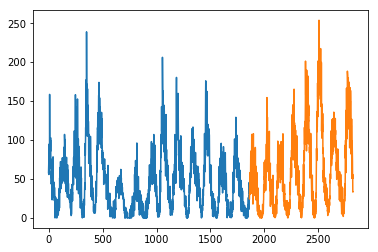

In [4]:
#plot train-test split of time series data
from matplotlib import pyplot as pt
pt.plot(train)
pt.plot([None for i in train] + [x for x in test])
pt.show()

Using a train-test split method to evaluate machine learning models is fast. Preparing the data is simple and intuitive and only one model is created and evaluated. It is useful when you have a large amount of data so that both training and tests sets are representative of the original problem.

## Multiple Train-Test Splits

The scikit-learn library provides this capability for us in the TimeSeriesSplit object. You must specify the number of splits to create and the TimeSeriesSplit to return the indexes of the train and test observations for each requested split.

Observations: 1411
Training Obs: 706
Testing Obvs: 705
Observations: 2116
Training Obs: 1411
Testing Obvs: 705
Observations: 2821
Training Obs: 2116
Testing Obvs: 705


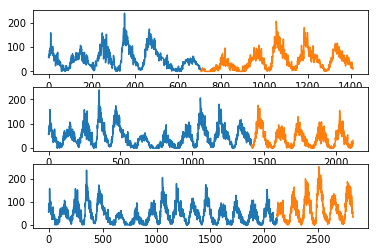

In [7]:
# Calculate repeated train-test splits of time series data
from pandas import Series
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot

series = Series.from_csv('sunspots.csv', header=0)
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train)+len(test)))
    print('Training Obs: %d' % len(train))
    print('Testing Obvs: %d' % len(test))
    pyplot.subplot(310+index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    index += 1
pyplot.show()

Using multiple train-test splits will result in more models being trained, and in turn, a more accurate estimate of the performance of the models on unseen data. A limitation of the train-test split approach is that the trained models remain fixed as they are evaluated on each evaluation in the test set. This may not be realistic as models can be retrained as new daily or monthly observations are made available.

## Walk Forward Validation

In practice, we very likely will retrain our model as new data becomes available. This would give the model the best opportunity to make good forecasts at each time step. We can evaluate our machine learning models under this assumption. There are few decisions to make:
1. Minimum Number of Observations. First, we must select the minimum number of observations required to train the model. This may be thought of as the window width if a sliding window is used (see next point).
2. Sliding or Expanding Window. Next, we need to decide whether the model will be trained on all data it has available or only on the most recent observations. This determines whether a sliding or expanding window will be used.

After a sensible configuration is chosen for your test-setup, models can be trained and evaluated.
1. Starting at the beginning of the time series, the minimum number of samples in the window is used to train a model.
2. The model makes a prediction for the next time step.
3. The prediction is stored or evaluated against the known value.
4. The window is expanded to include the known value and the process is repeated (go to step 1.)

Because this methodology involves moving along the time series one-time step at a time, it is often called Walk Forward Testing or Walk Forward Validation. Additionally, because a sliding or expanding window is used to train a model, this method is also referred to as Rolling Window Analysis or a Rolling Forecast.

In [11]:
# Walk forward evaluation model for time series data
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('sunspots.csv', header=0)
X = series.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    #print('train:%d, test=%d' % (len(train), len(test)))


Running the example simply prints the size of the training and test sets created. We can see the train set expanding each time step and the test set fixed at one time step ahead. Within the loop is where you would train and evaluate your model.

You can see that many more models are created. This has the benefit again of providing a much more robust estimation of how the chosen modeling method and parameters will perform in practice. This improved estimate comes at the computational cost of creating so many models. This is not expensive if the modeling method is simple or dataset is small (as in this example), but could be an issue at scale. In the above case, 2,820 models would be created and evaluated.

As such, careful attention needs to be paid to the window width and window type. These could be adjusted to contrive a test harness on your problem that is significantly less computationally expensive. Walk-forward validation is the gold standard of model evaluation. It is the k-fold cross-validation of the time series world and is recommended for your own projects.